# Data Science Salary Analysis

------------------------------

Research Questions and Work Breakdown:


- Salary increase/decrease from 2020-2024 - Khadija
- How does the average salary vary by experience? - Maria
- What is the breakdown of senior/mid-level/entry level jobs? Does this say anything about the job market right now? - Khadija 
- What is the average salary for popular job titles? - Maria
- Country totals for Data Science Jobs - Which country had the most data science jobs per capita? We can make calls to population statistics API’s to help with this, to see how these results normalize by population. Can this tell us which country has a more evolved service economy, particularly in the IT sphere?  - Riley
- API call notebook? - Riley



In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from pathlib import Path

In [68]:
data_science_csv_file_path = Path("../resources/data_science_salaries.csv")

data_science_salaries_df = pd.read_csv(data_science_csv_file_path)

data_science_salaries_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


## Khadija Notebook Injected Here

You can see the notebook on its own in scripts/khadija_notebook.ipynb

## What is the distribution of Data Science salaries in each year?



In [69]:
average_yearly_salary = data_science_salaries_df.groupby('work_year')['salary_in_usd'].mean()
average_yearly_salary

work_year
2020    102250.866667
2021     99501.287037
2022    131788.543165
2023    150791.420757
2024    153124.084063
Name: salary_in_usd, dtype: float64

<Figure size 1200x800 with 0 Axes>

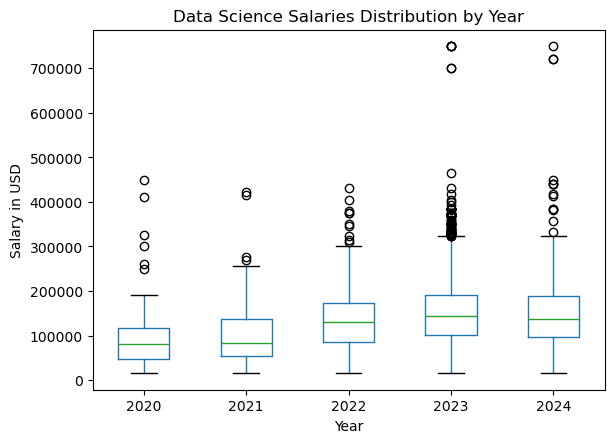

In [70]:
# Box plot
plt.figure(figsize=(12, 8))
data_science_salaries_df.boxplot(by='work_year', column='salary_in_usd', grid=False)
plt.title('Data Science Salaries Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.suptitle('')

plt.savefig(Path('../figures/khadija/fig001.png'))

plt.show()



# Salary by Job Title

In [71]:
salary_by_job= data_science_salaries_df.groupby('job_title')['salary_in_usd'].mean().reset_index()
salary_by_job

,job_title,salary_in_usd
0,AI Architect,232058.600000
1,AI Developer,141140.888889
2,AI Engineer,162616.250000
3,AI Product Manager,120000.000000
4,AI Programmer,67382.333333
...,...,...
127,Sales Data Analyst,60000.000000
128,Software Data Engineer,111627.666667
129,Staff Data Analyst,79917.000000
130,Staff Data Scientist,134500.000000


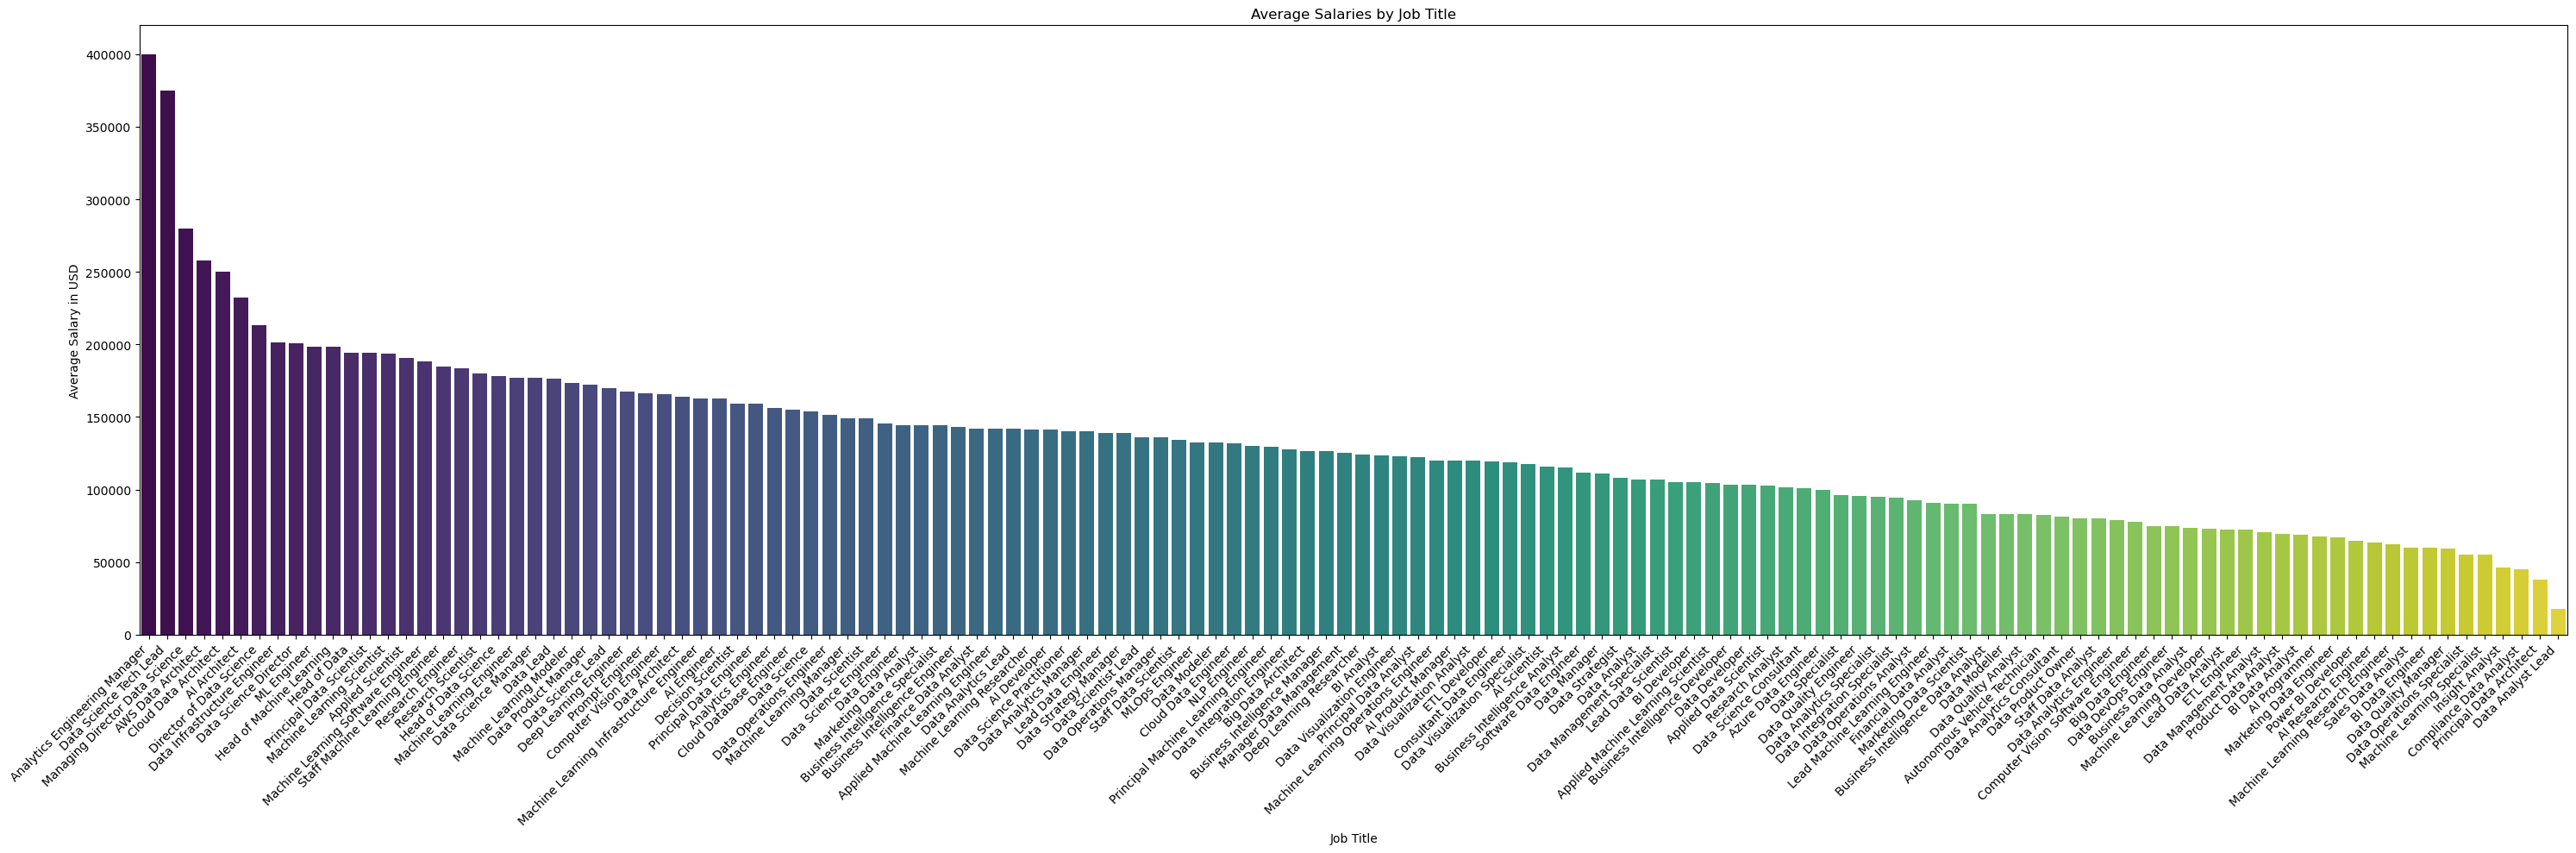

In [72]:
sorted_salary= salary_by_job.sort_values(by='salary_in_usd',ascending=False)
plt.figure(figsize=(30, 10))
sns.barplot(x='job_title', y='salary_in_usd', data=sorted_salary, palette='viridis')
plt.title(f'Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.savefig(Path('../figures/khadija/fig002.png'))

plt.show()



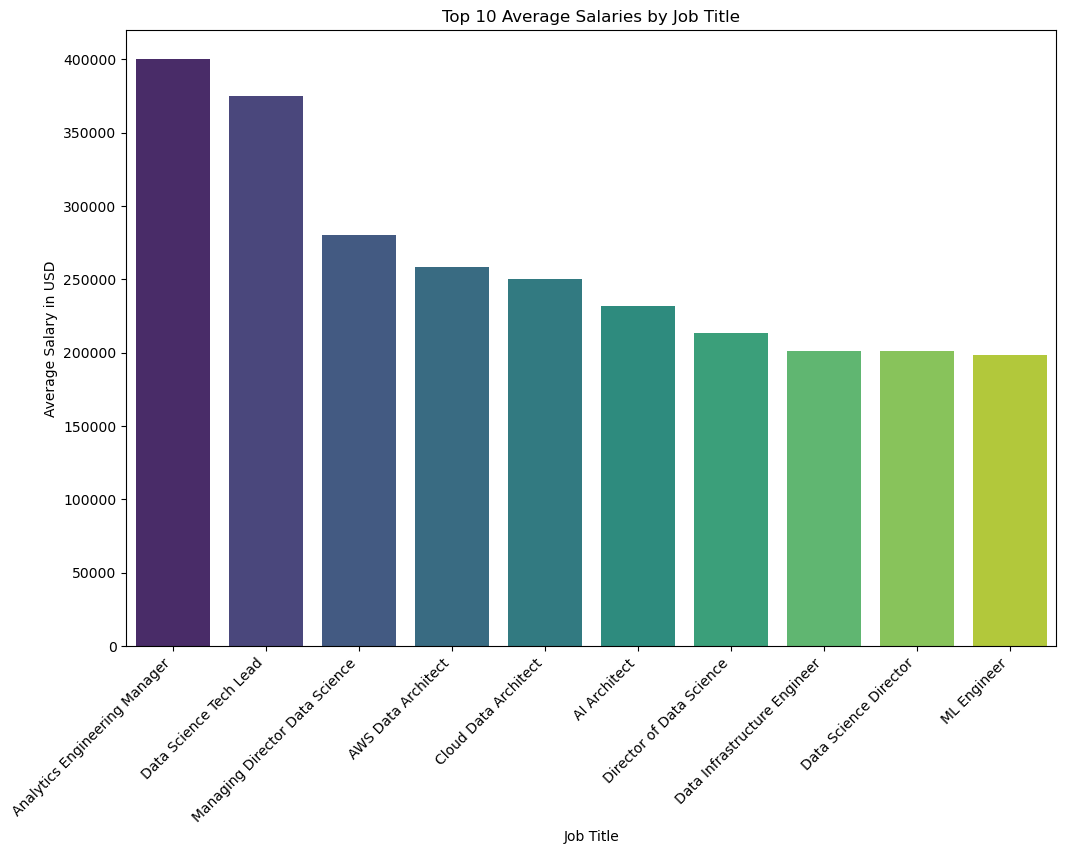

In [73]:
# Select top Ten job titles based on mean salary
top_num = 10  
top_jobs = salary_by_job.nlargest(top_num, 'salary_in_usd')

# Plot a bar chart for the top Ten job titles
plt.figure(figsize=(12, 8))
sns.barplot(x='job_title', y='salary_in_usd', data=top_jobs, palette='viridis')
plt.title(f'Top {top_num} Average Salaries by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')

plt.savefig(Path('../figures/khadija/fig003.png'))

plt.show()

#Populated the top 10 job titles with the highest average salary


## End of Khadija Notebook

## Maria Notebook injected here

You can see the notebook on its own in scripts/maria_notebook.ipynb

## Mean Salary Versus Exeperience



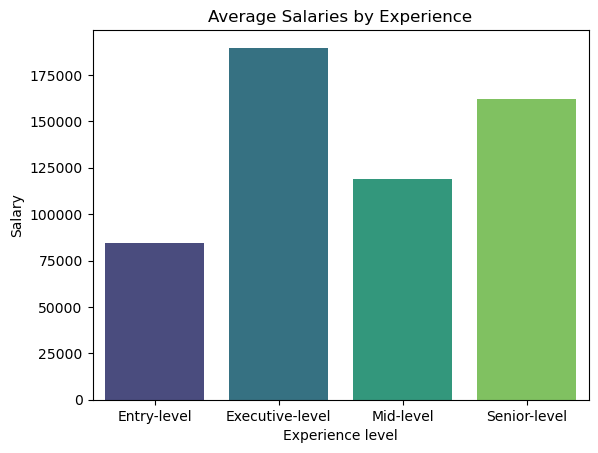

In [119]:
exp_salary=data_science_salaries_df.groupby('experience_level')['salary_in_usd'].mean().reset_index()


plt.title("Average Salaries by Experience")

sns.barplot(x='experience_level',y='salary_in_usd', data=exp_salary, palette='viridis')
plt.xlabel('Experience level')
plt.ylabel('Salary')

plt.savefig(Path('../figures/maria/fig001.png'))

In [75]:
job_titles = data_science_salaries_df.job_title.value_counts().head(11)
job_titles

job_title
Data Engineer                1307
Data Scientist               1243
Data Analyst                  910
Machine Learning Engineer     629
Analytics Engineer            246
Research Scientist            206
Data Architect                176
Research Engineer             136
ML Engineer                   113
Applied Scientist              97
Data Science Manager           86
Name: count, dtype: int64

In [76]:
de = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Engineer")]
ds = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Scientist")]
da = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Analyst")]
mle = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Machine Learning Engineer")]
ae = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Analytics Engineer")]
rs = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Research Scientist")]
da = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Architect")]
re = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Research Engineer")]
aps = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Applied Scientist")]
dsm = data_science_salaries_df[(data_science_salaries_df["job_title"] == "Data Science Manager")]

de_x= de.groupby("experience_level")["salary_in_usd"].mean()
ds_x = ds.groupby("experience_level")["salary_in_usd"].mean()
da_x = da.groupby("experience_level")["salary_in_usd"].mean()
mle_x = mle.groupby("experience_level")["salary_in_usd"].mean()
ae_x = ae.groupby("experience_level")["salary_in_usd"].mean()
rs_x = rs.groupby("experience_level")["salary_in_usd"].mean()
da_x = da.groupby("experience_level")["salary_in_usd"].mean()
re_x = re.groupby("experience_level")["salary_in_usd"].mean()
dsm_x = dsm.groupby("experience_level")["salary_in_usd"].mean()
aps_x = aps.groupby("experience_level")["salary_in_usd"].mean()


In [77]:
job_x = pd.DataFrame({"Data Engineer": de_x, 
                    "Data Scientist": ds_x,
                    "Data Analyst" : da_x,
                    "Machine Learning Engineer": mle_x,
                    "Analytics Engineer": ae_x,
                    "Research Scientist": rs_x,
                    "Data Architect": da_x,
                    "Research Engineer": re_x,                    
                    "Applied Scientist": aps_x,
                    "Data Science Manager": dsm_x})
                    
job_x

,Data Engineer,Data Scientist,Data Analyst,Machine Learning Engineer,Analytics Engineer,Research Scientist,Data Architect,Research Engineer,Applied Scientist,Data Science Manager
experience_level,,,,,,,,,,
Entry-level,79441.086207,83387.103093,NaN,96381.620690,94317.571429,144914.105263,NaN,118936.888889,180420.000000,NaN
Executive-level,195357.376471,189050.521739,167500.000000,190950.000000,185916.666667,163017.666667,167500.000000,NaN,NaN,194128.571429
Mid-level,117253.144044,115501.054711,135631.500000,142579.573770,143762.772727,173199.920635,135631.500000,181382.625000,166099.333333,164924.333333
Senior-level,156129.567870,169793.449622,166420.886076,190974.493644,159792.770492,189610.595041,166420.886076,198164.337209,196351.289474,178167.437500


In [78]:
jobs_to_keep = ("Data Engineer", 
               "Data Scientist",
               "Data Analyst",
               "Machine Learning Engineer",
               "Analytics Engineer",
               "Research Scientist",
               "Data Architect",
               "Research Engineer",                    
               "Applied Scientist",
               "Data Science Manager")

condition = data_science_salaries_df ['job_title'].isin(jobs_to_keep)
top_jobs_df = data_science_salaries_df[condition]
top_jobs_df.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
8,Data Engineer,Executive-level,Full-time,Remote,2024,United States,219650,USD,219650,United States,Medium


## Mean Salary Versus Exeperience for Popular Job Titles



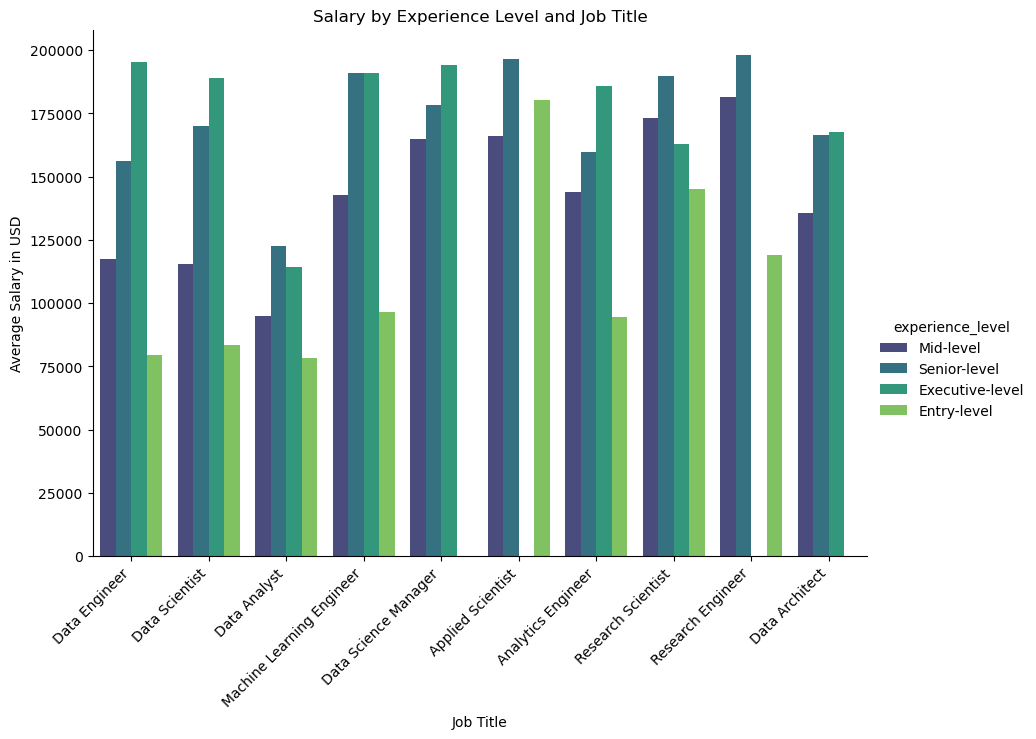

In [100]:

sns.catplot(x='job_title', y='salary_in_usd', hue='experience_level', data= top_jobs_df,  kind='bar', palette='viridis', height=6, aspect=1.5, errorbar=None)
plt.title('Salary by Experience Level and Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')

plt.savefig(Path("../figures/maria/fig002"))



## End of Maria Notebook

## Riley Notebook injected here

You can see the notebook on its own in scripts/riley_notebook.ipynb

# Geographic Breakdown and Analysis of Data Science Job Postings to ai-jobs.net

### Extra Data Grabbed from the World Bank API

Author: Riley Taylor

Source of ai-jobs.net data science salaries:  https://www.kaggle.com/datasets/sazidthe1/data-science-salaries?resource=download

See the api_call_to_csv.ipynb file for more information on how/what I grabbed from the world bank api. Warning: it's messy, because I only needed to run it once to create the world_bank_api_data.csv. I had plans to do more but time constraints limited the search.



In [80]:
data_science_csv_file_path = Path("../resources/data_science_salaries.csv")
data_science_salaries_df = pd.read_csv(data_science_csv_file_path)

world_bank_api_data_file_path = Path("../resources/world_bank_api_data.csv")
world_bank_api_data_df = pd.read_csv(world_bank_api_data_file_path)

display(data_science_salaries_df.head())


#notice that when we read this from the csv, we get an extra index column, under 'Unnamed: 0'.
#we will have to remove that column
display(world_bank_api_data_df.head())

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


,Unnamed: 0,country,id,year,population,gdp_pc,tech_manu_percent
0,0,United States,US,2022,333287557,76329.582265,17.850454
1,1,Romania,RO,2022,19047009,15786.801742,11.613934
2,2,Portugal,PT,2022,10409704,24515.265851,6.154774
3,3,Lebanon,LB,2022,5489739,NaN,15.133122
4,4,India,IN,2022,1417173173,2410.888021,12.481728


In [81]:
#copying to a separate dataframe to prevent naming collisions, selecting columns as a subset

salaries_df = data_science_salaries_df.copy()
salaries_df = salaries_df[['job_title', 'experience_level', 'employment_type', 'work_models', 'work_year', 'employee_residence', 'company_location', 'salary_in_usd']]
salaries_df.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,company_location,salary_in_usd
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,United States,148100
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,United States,98700
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,United States,140032
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,United States,100022
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,United States,120000


In [82]:
world_bank_df = world_bank_api_data_df.copy()
world_bank_df = world_bank_df[['country', 'id', 'year', 'population', 'gdp_pc', 'tech_manu_percent']]
world_bank_df.head()

,country,id,year,population,gdp_pc,tech_manu_percent
0,United States,US,2022,333287557,76329.582265,17.850454
1,Romania,RO,2022,19047009,15786.801742,11.613934
2,Portugal,PT,2022,10409704,24515.265851,6.154774
3,Lebanon,LB,2022,5489739,NaN,15.133122
4,India,IN,2022,1417173173,2410.888021,12.481728


## Question: Which countries have the highest salaries for data science jobs (by employee residence)?

### Conclusion:

This sort of conforms to expectations. The most developed countries we see at the top, and some of the least developed countries we see at the bottom. But we also notice that this alone is not a predictor of welfare of the country. Israel, Qatar, Malaysia, and Saudi Arabia are in the top 10, for example. Puerto Rico (which tends to be treated separately in these studies) and the United States are 4th and 5th respectively. Much of the EU resides in the middle - which is another sign that this might not necessarily correlate with development, but more closely with specific factors regarding the labor market in a country. Perhaps you could observe a correlation between educatoin level of a country and lower income for certain countries, because these factors might indicate an abundance of technical labor, which can lower the cost of said labor. 

We also very much should note that we have not filtered out outliers from the dataset - considering those jobs did exist at said salary, it feels disingenuous to filter them out, and can provide an interesting point of discussion as to why a certain country might be higher/lower than expected. Also, some countries have more/fewer jobs postings which could make outliers more/less impactful. Some analysis will be done on these topics later.

This also doesn't talk about pruchasing power parity, PPP. $1 USD in Viet Nam goes a lot further than $1 USA in Switzerland. So to reflect quality of life of Data Science employees, that could be another exploration. But you can expect it to act as a sort of equilibrating force, that causes the lower developed countries (near the bottom) and the higher developed countries (near the top) to bunch tighter. Again, that alone doesn't tell the whole story. Economics can sometimes be seen as the search for a "golden metric" while also realizing that that pursuit is impossible.  

Something to note - this data is by employee residence, not company location. So you could have American businesses working in China for example that boost salaries in China. Typically though, businesses adjust salaries according to employee residence. 

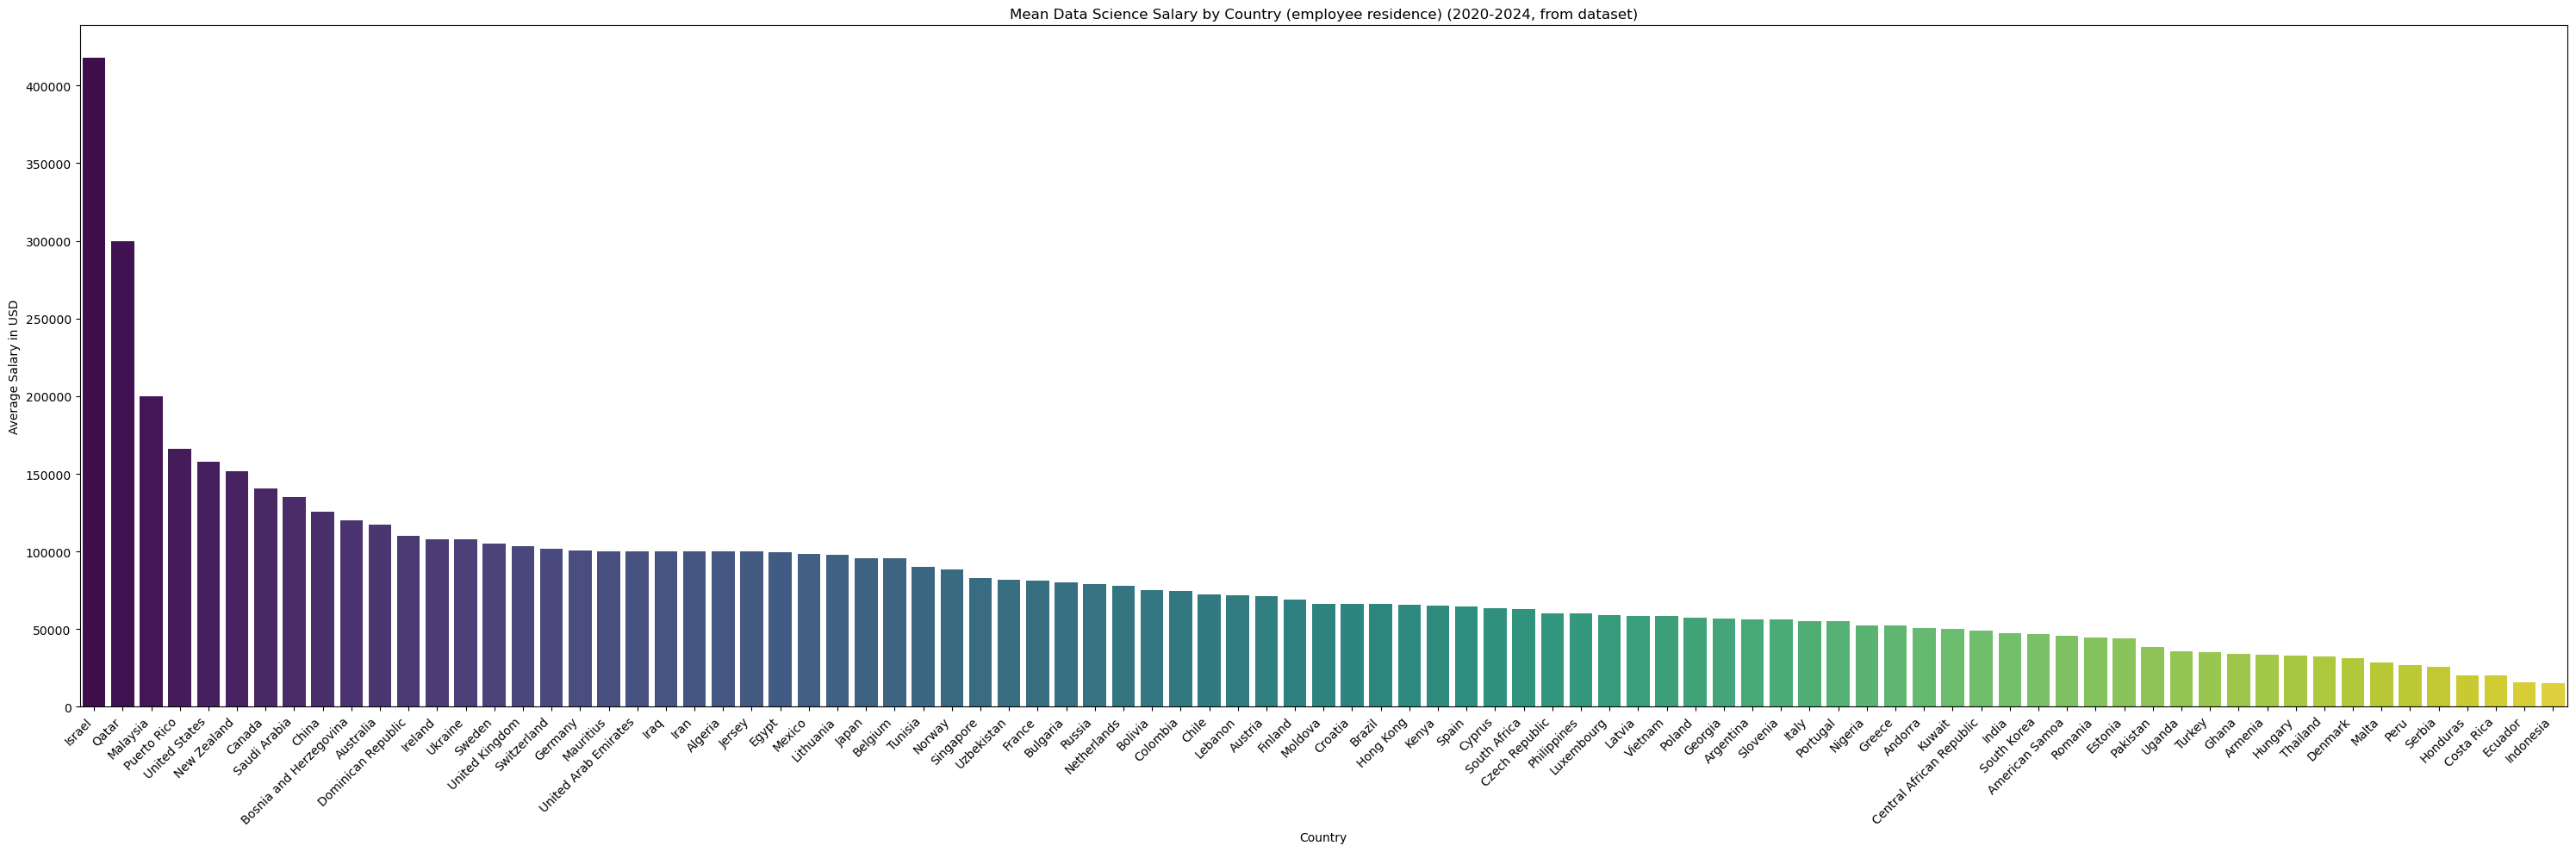

In [83]:
country_employee_salary_df = salaries_df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
sorted_country_employee_salary_df = country_employee_salary_df.sort_values(by='salary_in_usd',ascending=False)


plt.figure(figsize=(30, 10))
sns.barplot(x='employee_residence', y='salary_in_usd', data=sorted_country_employee_salary_df, palette='viridis')
plt.title(f'Mean Data Science Salary by Country (employee residence) (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.savefig(Path('../figures//riley/fig001.png'))

plt.show()


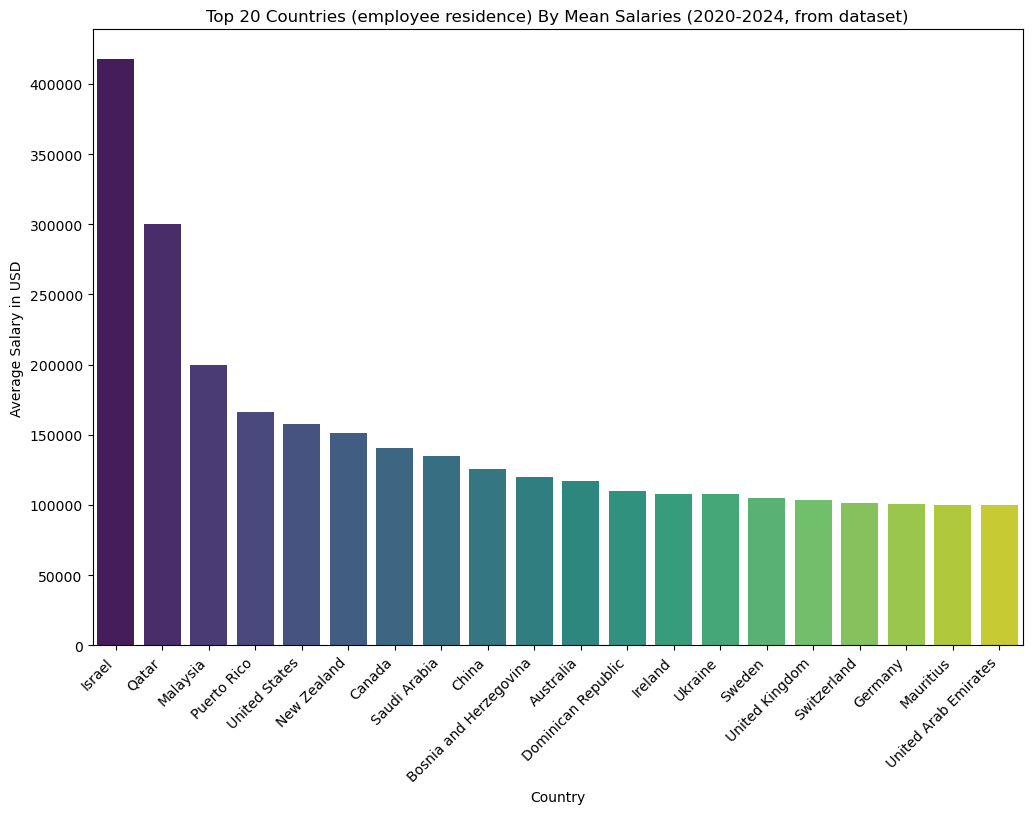

In [84]:
#showing the top 20:

top_num = 20  
top_num_df = sorted_country_employee_salary_df.nlargest(top_num, 'salary_in_usd')

# #top 20 countries by data science salaries for employees residing in said country
# display(sorted_country_employee_salary_df.head(20))

plt.figure(figsize=(12, 8))
sns.barplot(x='employee_residence', y='salary_in_usd', data=top_num_df, palette='viridis')
plt.title(f'Top {top_num} Countries (employee residence) By Mean Salaries (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')

plt.savefig(Path('../figures//riley/fig002.png'))

plt.show()

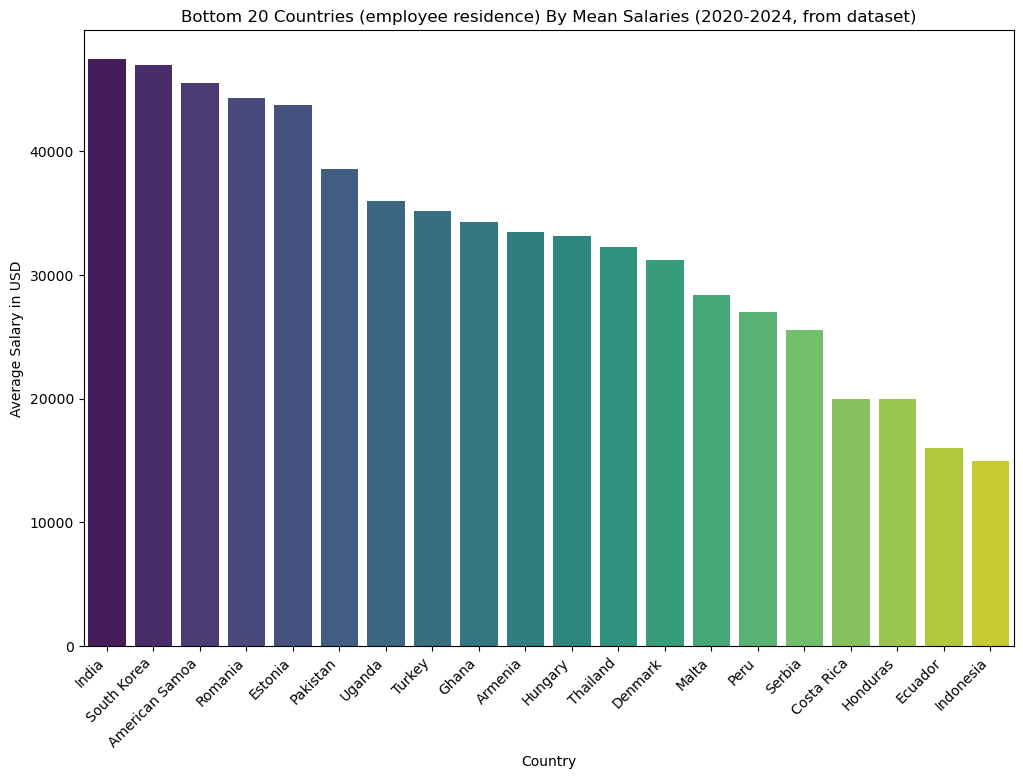

In [85]:
#showing the bottom 20:

bottom_num = 20  
bottom_num_df = sorted_country_employee_salary_df.nsmallest(bottom_num, 'salary_in_usd')
bottom_num_df = bottom_num_df.sort_values(by='salary_in_usd',ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='employee_residence', y='salary_in_usd', data=bottom_num_df, palette='viridis')
plt.title(f'Bottom {bottom_num} Countries (employee residence) By Mean Salaries (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')

plt.savefig(Path('../figures//riley/fig003.png'))
plt.show()

## Question: Which countries have the highest salaries for data science jobs (by company location)?

### Conclusion:

In essence, we are repeating the previous exploration, but limiting the countries to company location. Note - the list of employee residences is different from the list of company locations, so we will have new/different countries when we compare them. 

And some of the factors that we discussed in our previous conclusion do in fact show up! China for example, was supposedly higher on the employee residence distribution because it could have companies from outside the country paying workers higher than companies in China. And when we look at the distribution, we notice exactly that result - data science jobs for companies based in China pay far less (the mean for employee residence was ~$130k, while the mean for company location was ~$100k). And we see China move from 9th to 20th as a result. 

A few other big movers - we see Japan jump into the top 20, and several European companies shifted, but as a whole they stayed in the center/upper ranges. The bottom 20 has also changed, and more closely aligns with expectations/development rankings for those countries (for example, Denmark moving out of the bottom 20, while Ghana fell). Developing countries are newer to the scene and can be expected to have fewer companies, so this makes sense. 

We expect these figures to be more telling about country policy and national tech labor markets, because the companies themselves reside in the country. 


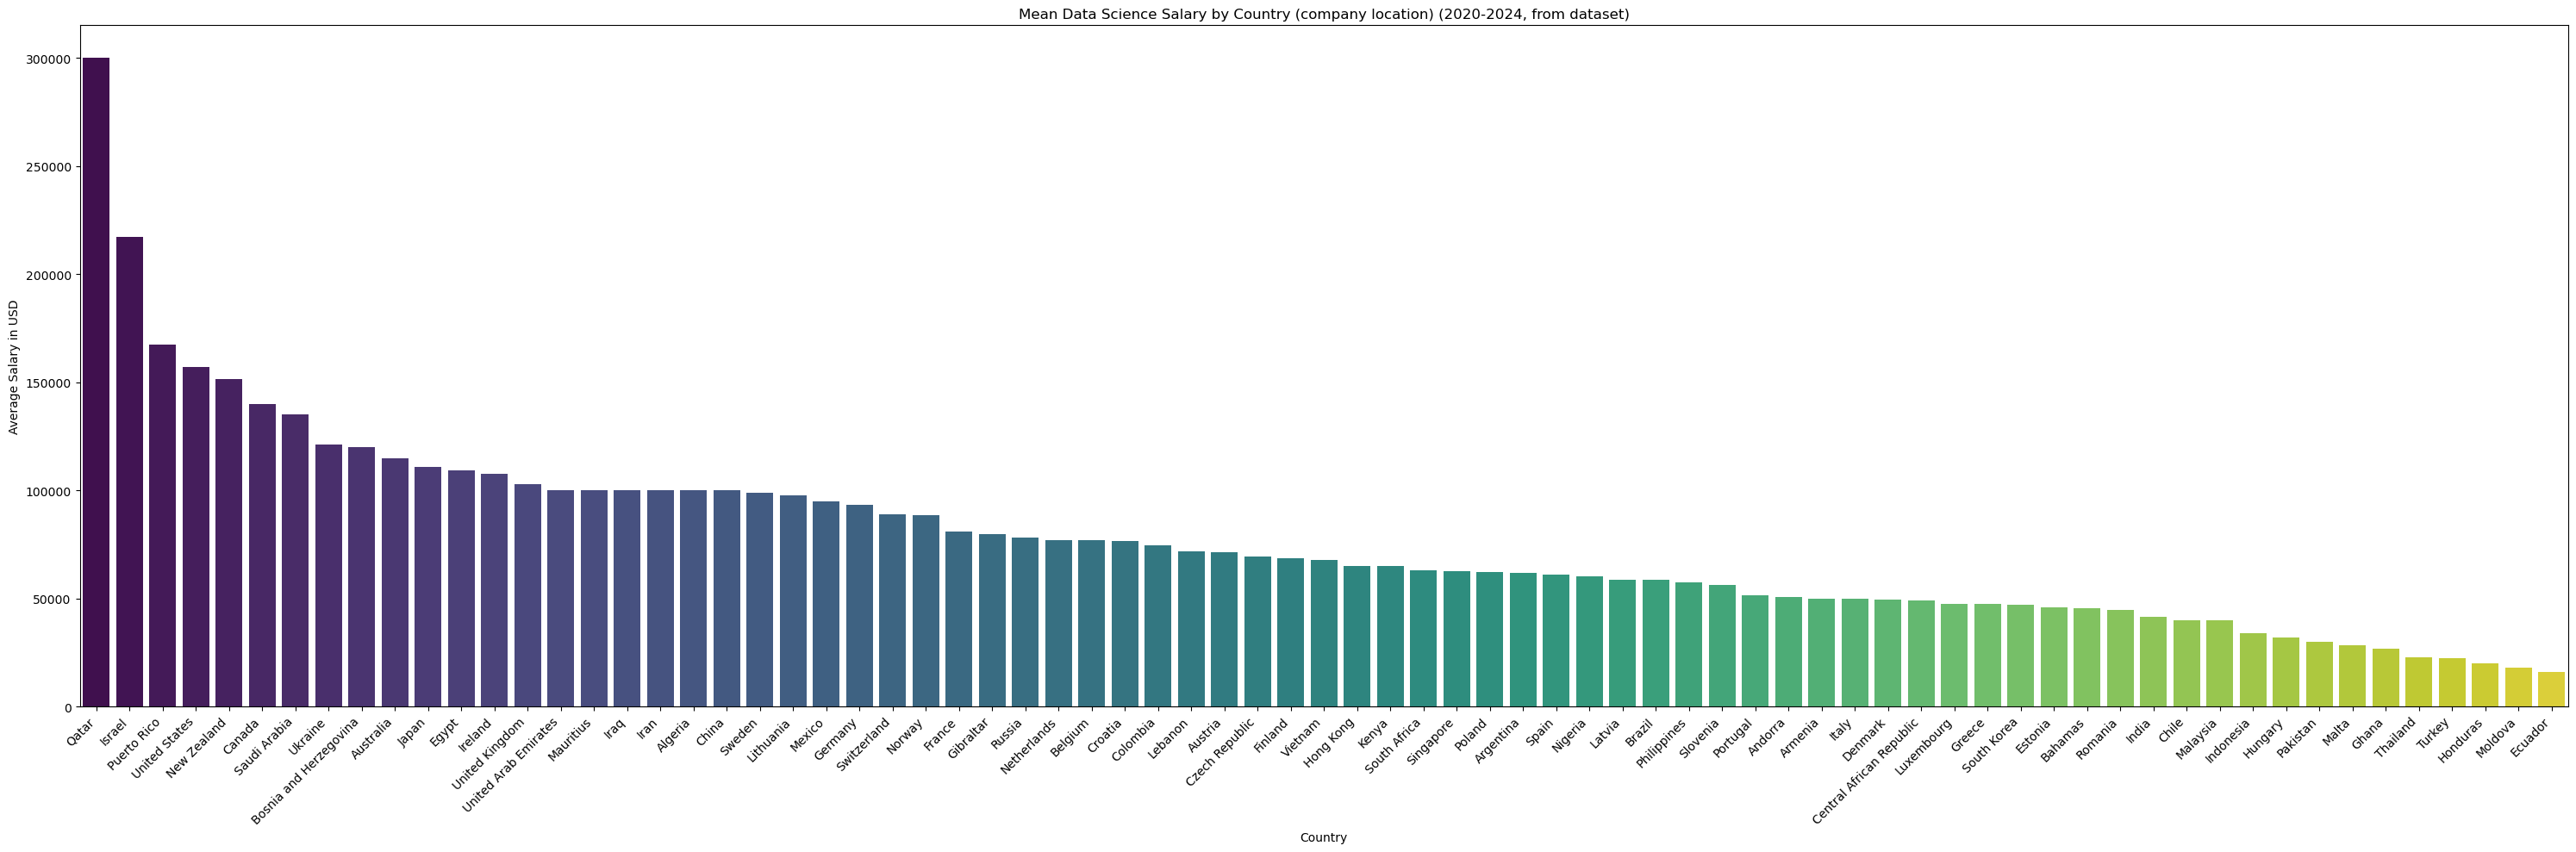

In [86]:
country_company_salary_df = salaries_df.groupby('company_location')['salary_in_usd'].mean().reset_index()
sorted_country_company_salary_df = country_company_salary_df.sort_values(by='salary_in_usd',ascending=False)


plt.figure(figsize=(30, 10))
sns.barplot(x='company_location', y='salary_in_usd', data=sorted_country_company_salary_df, palette='viridis')
plt.title(f'Mean Data Science Salary by Country (company location) (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.savefig(Path('../figures//riley/fig004.png'))
plt.show()


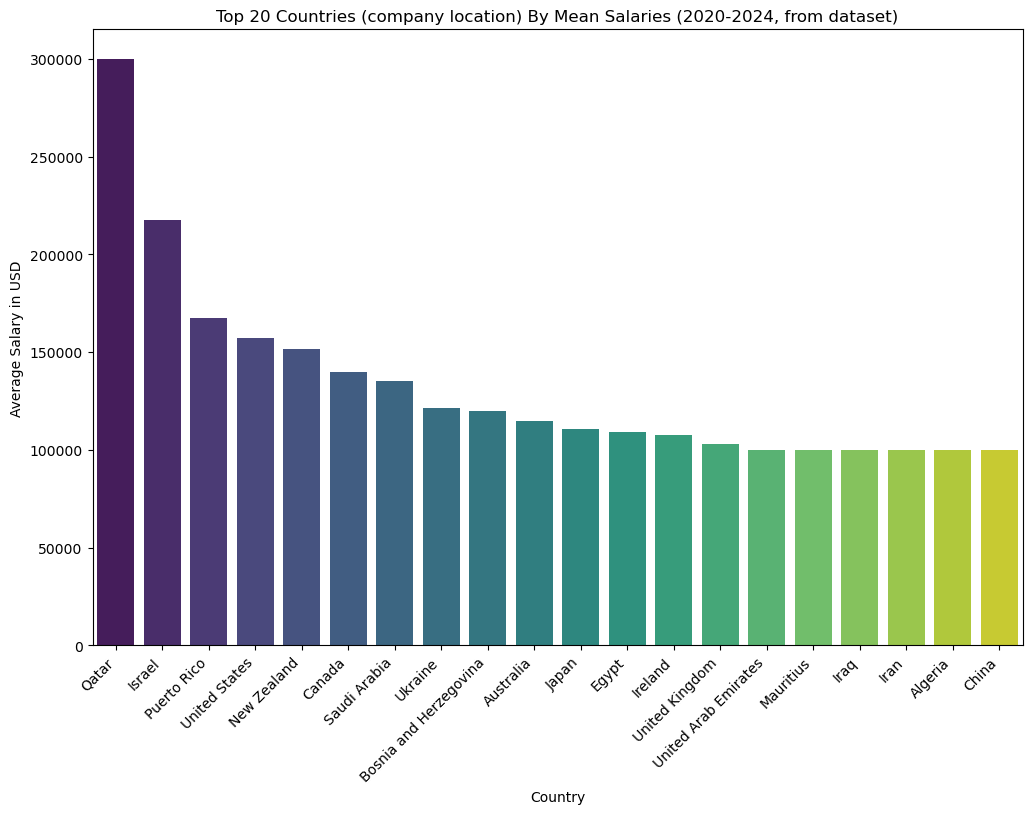

In [87]:
#showing the top 20:

top_num = 20  
top_num_df = sorted_country_company_salary_df.nlargest(top_num, 'salary_in_usd')

# #top 20 countries by data science salaries for employees residing in said country
# display(sorted_country_employee_salary_df.head(20))

plt.figure(figsize=(12, 8))
sns.barplot(x='company_location', y='salary_in_usd', data=top_num_df, palette='viridis')
plt.title(f'Top {top_num} Countries (company location) By Mean Salaries (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')

plt.savefig(Path('../figures//riley/fig005.png'))
plt.show()


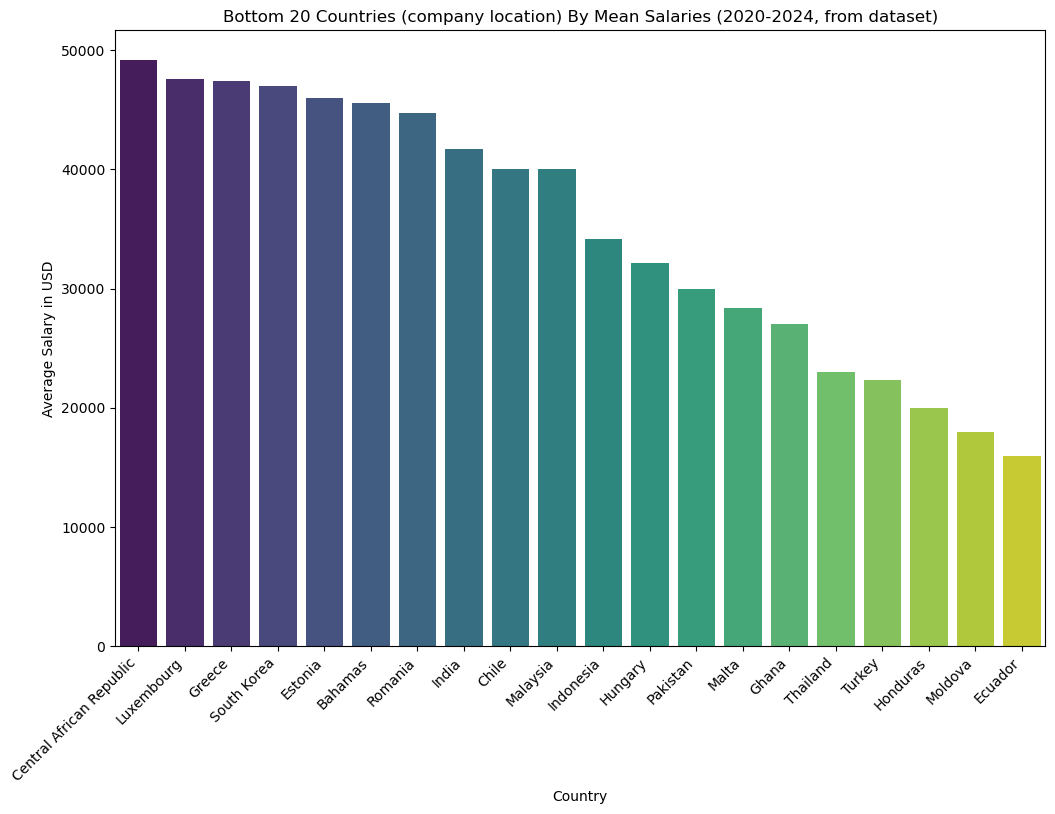

In [88]:
#showing the bottom 20:

bottom_num = 20  
bottom_num_df = sorted_country_company_salary_df.nsmallest(bottom_num, 'salary_in_usd')
bottom_num_df = bottom_num_df.sort_values(by='salary_in_usd',ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='company_location', y='salary_in_usd', data=bottom_num_df, palette='viridis')
plt.title(f'Bottom {bottom_num} Countries (company location) By Mean Salaries (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')

plt.savefig(Path('../figures//riley/fig006.png'))
plt.show()


## Question: Which countries posted the most data science jobs (by employee residence)?

### Conclusion:

Yikes, the data is heavily skewed towards the American market. This could be telling of a lot of things - the limitations of the data set, the size of the American data sicence market compared to international markets, perhaps a skew towards English speaking job posts in how the data set is collected - there's a lot to say here. 

But it does place a bit of an asterisk over the confidence in previous data. The top 35 countries all have at least 5 job postings in our dataset, but the bottom 26 or so only have 1 job posting in the dataset. But! This does explain some of the outliers in previous data - qater and israel for example only have 1 job posting, so that explains how they were so high. 

We could clean the data more in the future and focus on visualizations of purely data with >10 job postings, for example. Or, we could adopt a threshold based on job postings per country population. 

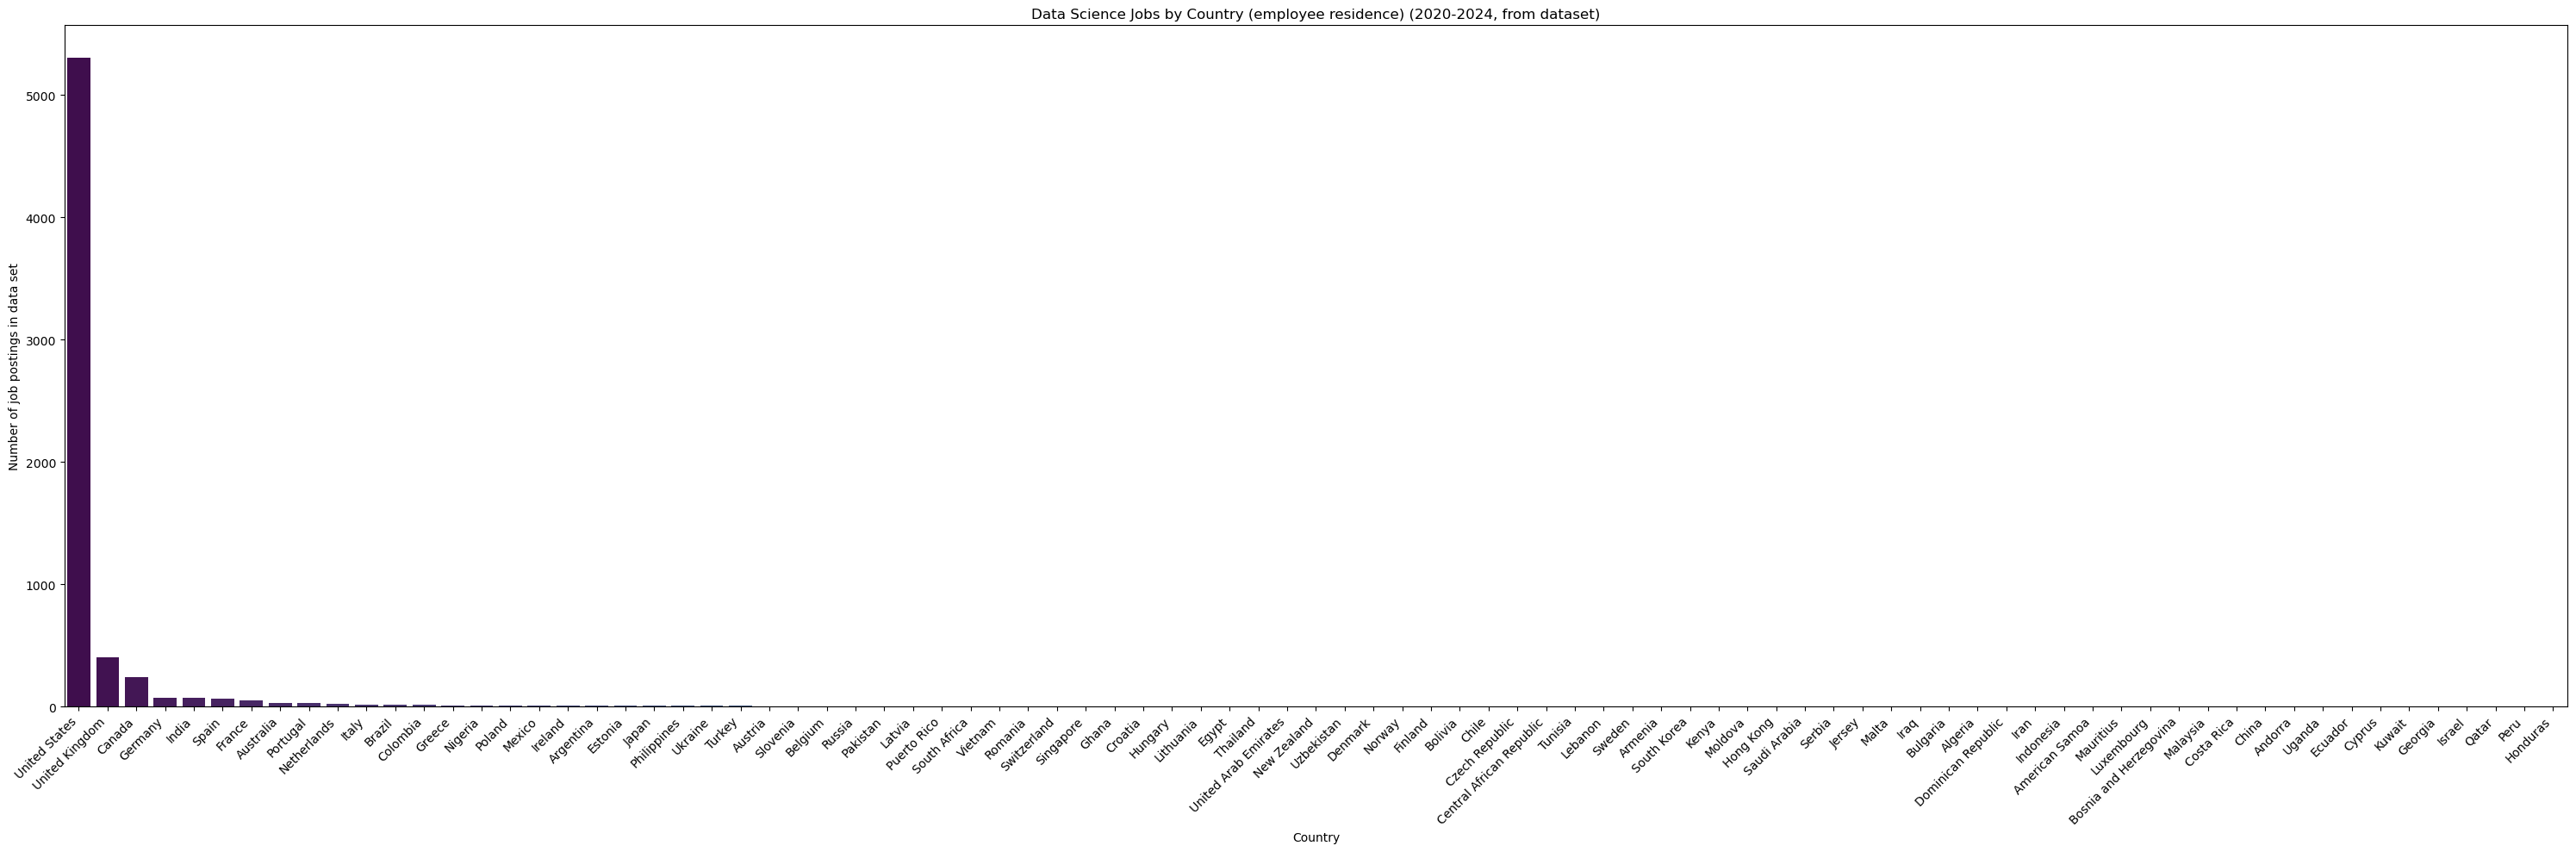

In [89]:
country_employee_counts_df = salaries_df['employee_residence'].value_counts().reset_index()

sorted_country_employee_counts_df = country_employee_counts_df
sorted_country_employee_counts_df.columns = ['employee_residence', 'count']
# display(sorted_country_employee_counts_df)

plt.figure(figsize=(30, 10))
sns.barplot(x='employee_residence', y='count', data=sorted_country_employee_counts_df, palette='viridis')
plt.title(f'Data Science Jobs by Country (employee residence) (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Number of job postings in data set')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.savefig(Path('../figures//riley/fig007.png'))
plt.show()


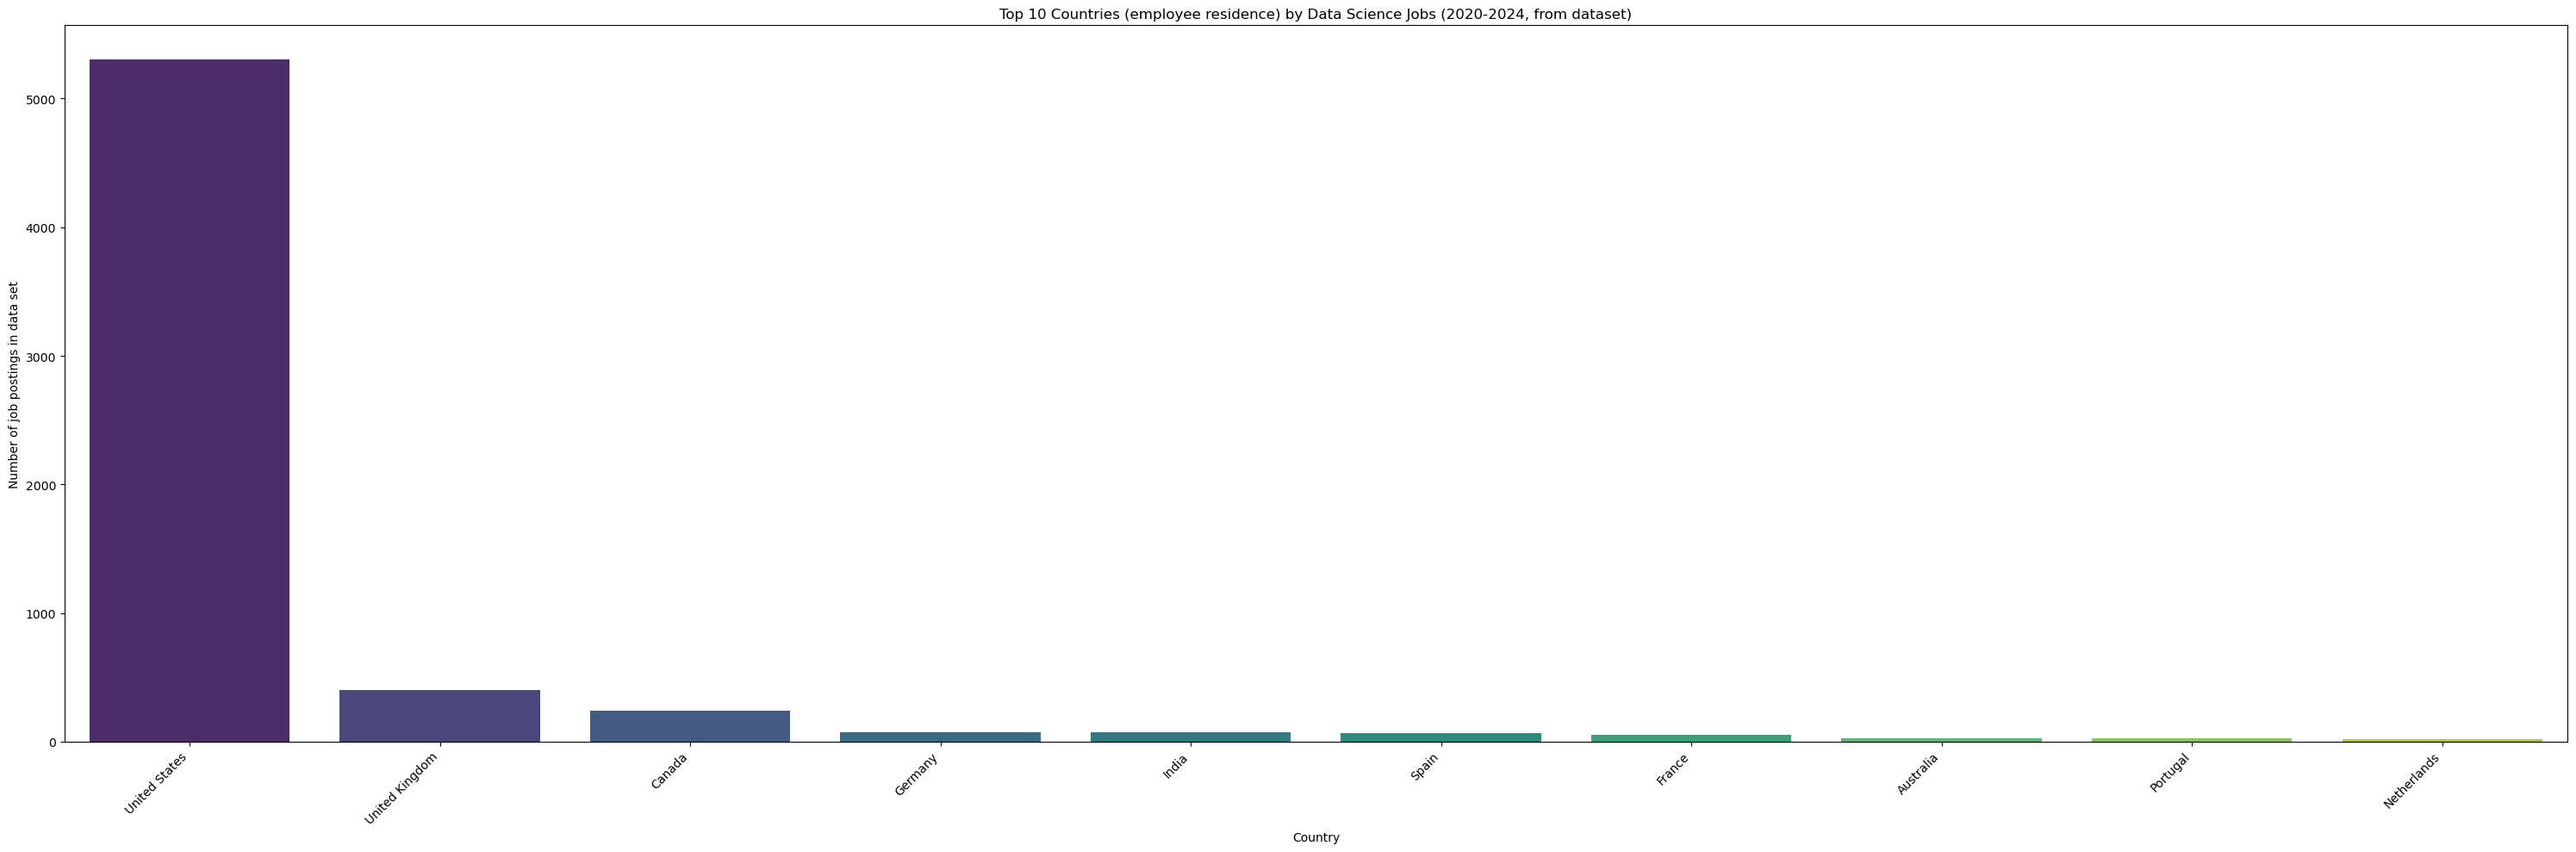

In [90]:
#display top 10:
top_num = 10
top_num_df = sorted_country_employee_counts_df.nlargest(top_num, 'count')

plt.figure(figsize=(30, 10))
sns.barplot(x='employee_residence', y='count', data=top_num_df, palette='viridis')
plt.title(f'Top {top_num} Countries (employee residence) by Data Science Jobs (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Number of job postings in data set')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.savefig(Path('../figures//riley/fig008.png'))
plt.show()

In [91]:
display(sorted_country_employee_counts_df)


,employee_residence,count
0,United States,5305
1,United Kingdom,401
2,Canada,241
3,Germany,71
4,India,70
...,...,...
82,Georgia,1
83,Israel,1
84,Qatar,1
85,Peru,1


## Question: Which countries posted the most data science jobs (by company location)?

### Conclusion:


Performing the above, but with company location instead of employee residence. I expect to see a very similar distribution - drastically skewed towards America. And we do see that skew. Let's move on to other explorations - we have learned that the data set appears drastically skewed towards America. Perhaps the skew is less drastic if we control for population?

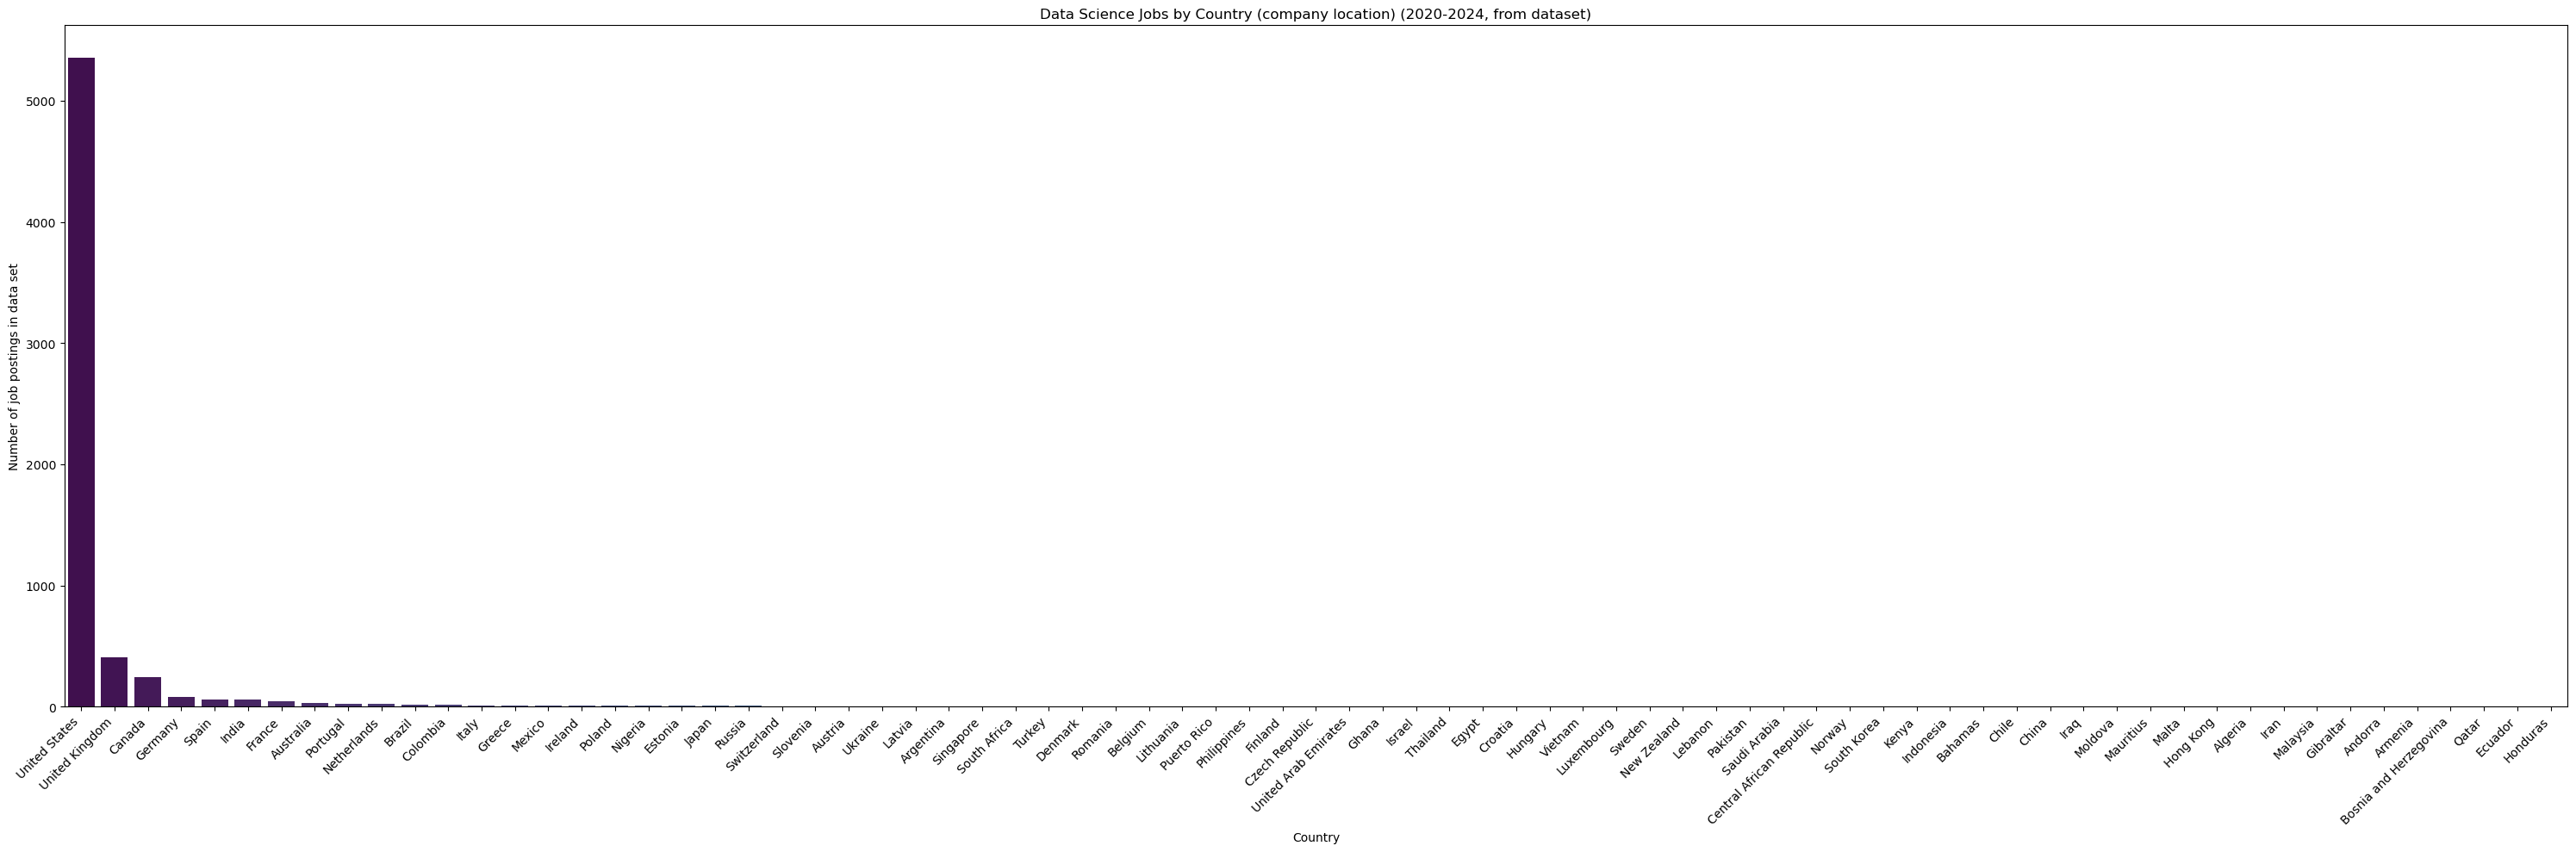

In [92]:
country_company_counts_df = salaries_df['company_location'].value_counts().reset_index()

sorted_country_company_counts_df = country_company_counts_df
sorted_country_company_counts_df.columns = ['company_location', 'count']
# display(sorted_country_employee_counts_df)

plt.figure(figsize=(30, 10))
sns.barplot(x='company_location', y='count', data=sorted_country_company_counts_df, palette='viridis')
plt.title(f'Data Science Jobs by Country (company location) (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Number of job postings in data set')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.savefig(Path('../figures//riley/fig009.png'))
plt.show()


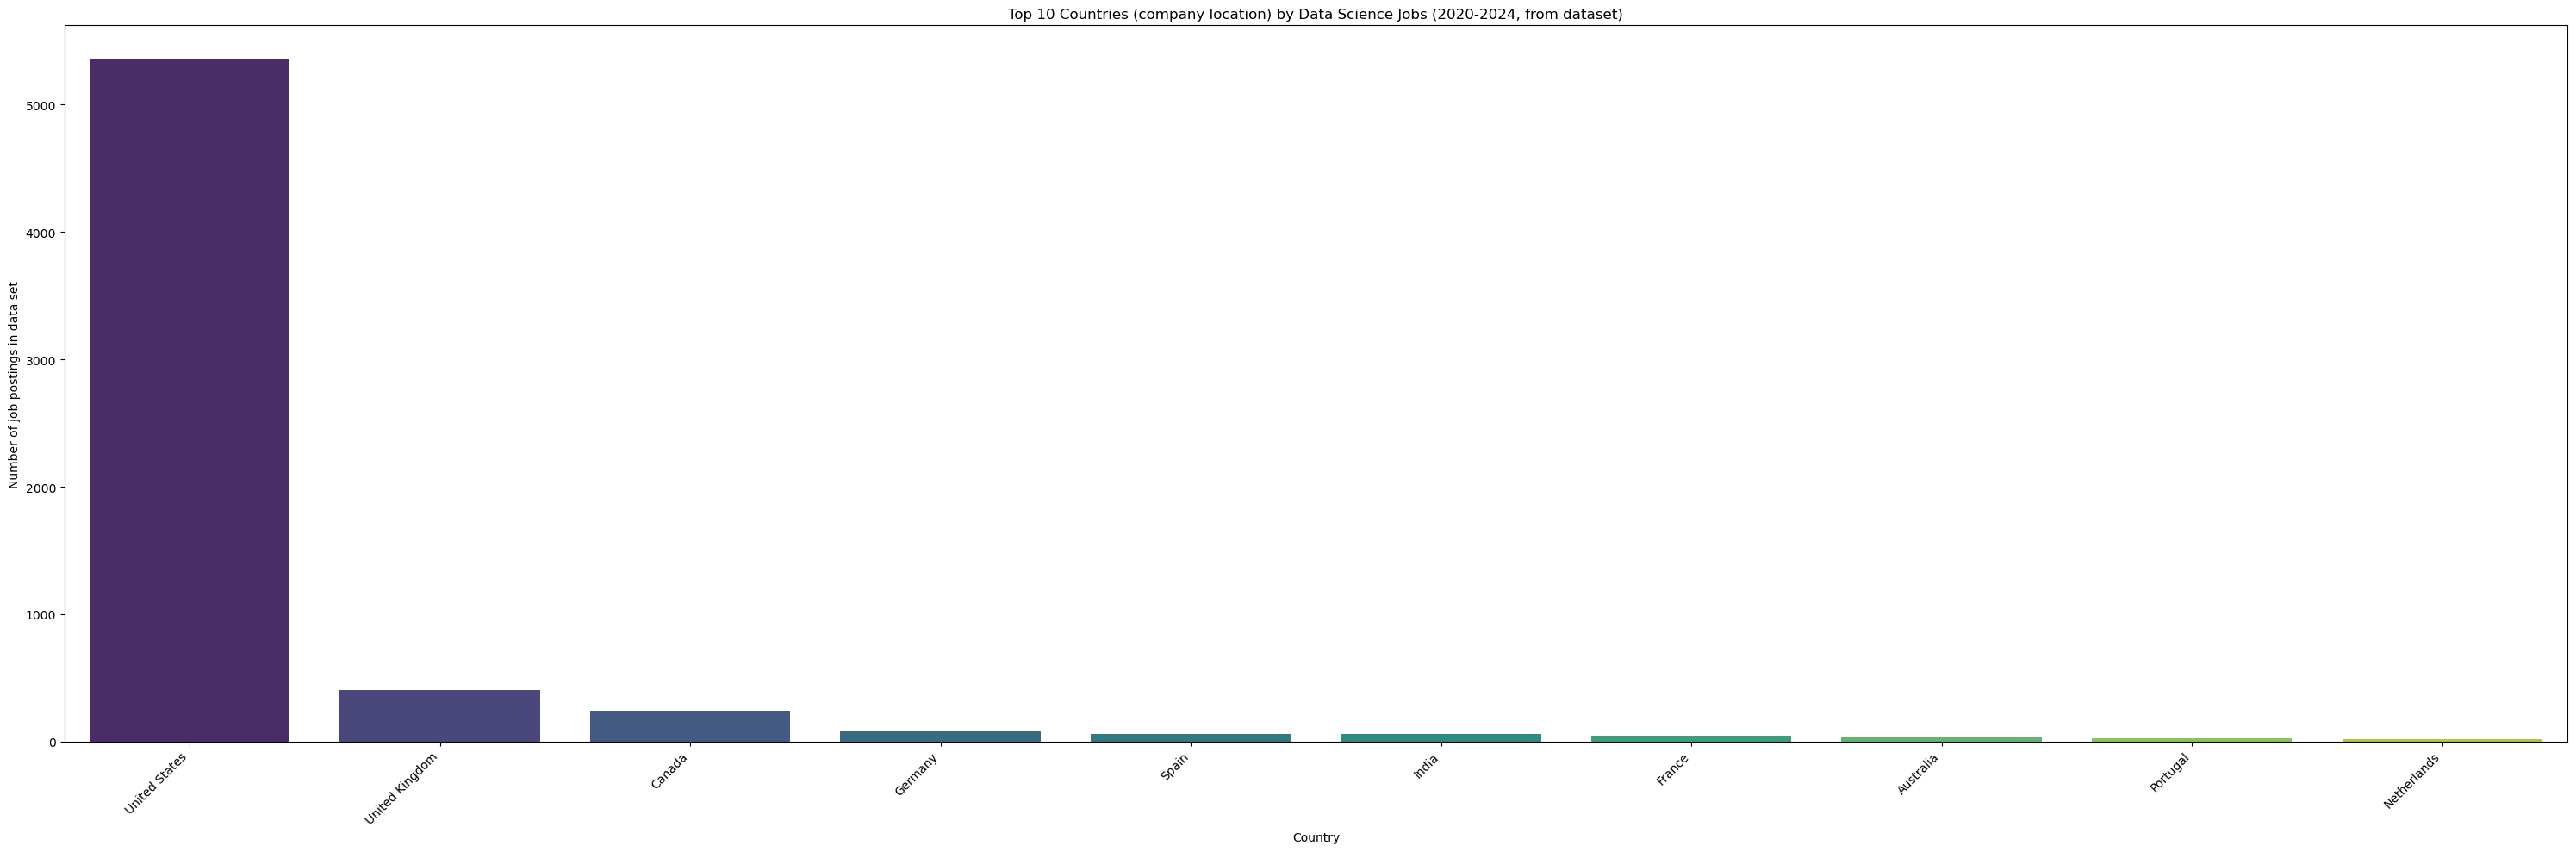

In [93]:
top_num = 10
top_num_df = sorted_country_company_counts_df.nlargest(top_num, 'count')

plt.figure(figsize=(30, 10))
sns.barplot(x='company_location', y='count', data=top_num_df, palette='viridis')
plt.title(f'Top {top_num} Countries (company location) by Data Science Jobs (2020-2024, from dataset)')
plt.xlabel('Country')
plt.ylabel('Number of job postings in data set')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

plt.savefig(Path('../figures//riley/fig010.png'))
plt.show()


## Question: Which countries posted the most data science jobs, per capita (by company location)?

### Conclusion:

Now we can normalize the count data and try to see how much different countries use ai-jobs.net. In some respects this is telling of the presence of the data science industry in that country, but it seems more telling of just the pervasiveness of ai-jobs.net as a tool for companies/data scientists around the world. 

And boy, we see quite a difference! America isn't even the top dog anymore, thanks to Gibraltar's tiny population. But this becomes a decent metric at measuring how saturated the use ai-jobs.net is as a tool for posting data science jobs in different countries. If every country used it evenly, the only variation would be due to the presence of more data science jobs per person in one country compared to another. 

So with those being the two main factors, you are left to some assumptions and takeaways.

Notice the top 20 are exclusively highly developed nations this time. This makes sense, because developing nations tend to have larger populations and lower rates of technical positions. You can also see the Baltic states, which are tech hubs for Eastern Europe, demonstrating their higher activity in the tech sector, with Estonia, Latvia, and Lithuania all in the top 20.

I think this definitely helps renew some trust in the data, and makes me feel that we have at least somewhat comparable rates of use of ai-jobs.net across the top 20 countries. 



In [94]:
#dataframes to use:
# sorted_country_company_counts_df
# world_bank_df

country_population_df = world_bank_df[['country','population']]
# country_population_df.head()

#we might run into some precision issues when we have such small percentages, not sure how python treats that

#create a new dataframe that inner merges (intersection) the dataframes we want to use, then create a column for "counts/population"
country_company_count_population_df = sorted_country_company_counts_df.merge(country_population_df, left_on='company_location', right_on='country', how='inner')

country_company_count_population_df['counts_per_capita'] = country_company_count_population_df['count']/country_company_count_population_df['population']

country_company_count_population_df.head()

,company_location,count,country,population,counts_per_capita
0,United States,5354,United States,333287557,1.606421e-05
1,United Kingdom,408,United Kingdom,66971395,6.092153e-06
2,Canada,243,Canada,38929902,6.241988e-06
3,Germany,78,Germany,83797985,9.308100e-07
4,Spain,63,Spain,47778340,1.318589e-06


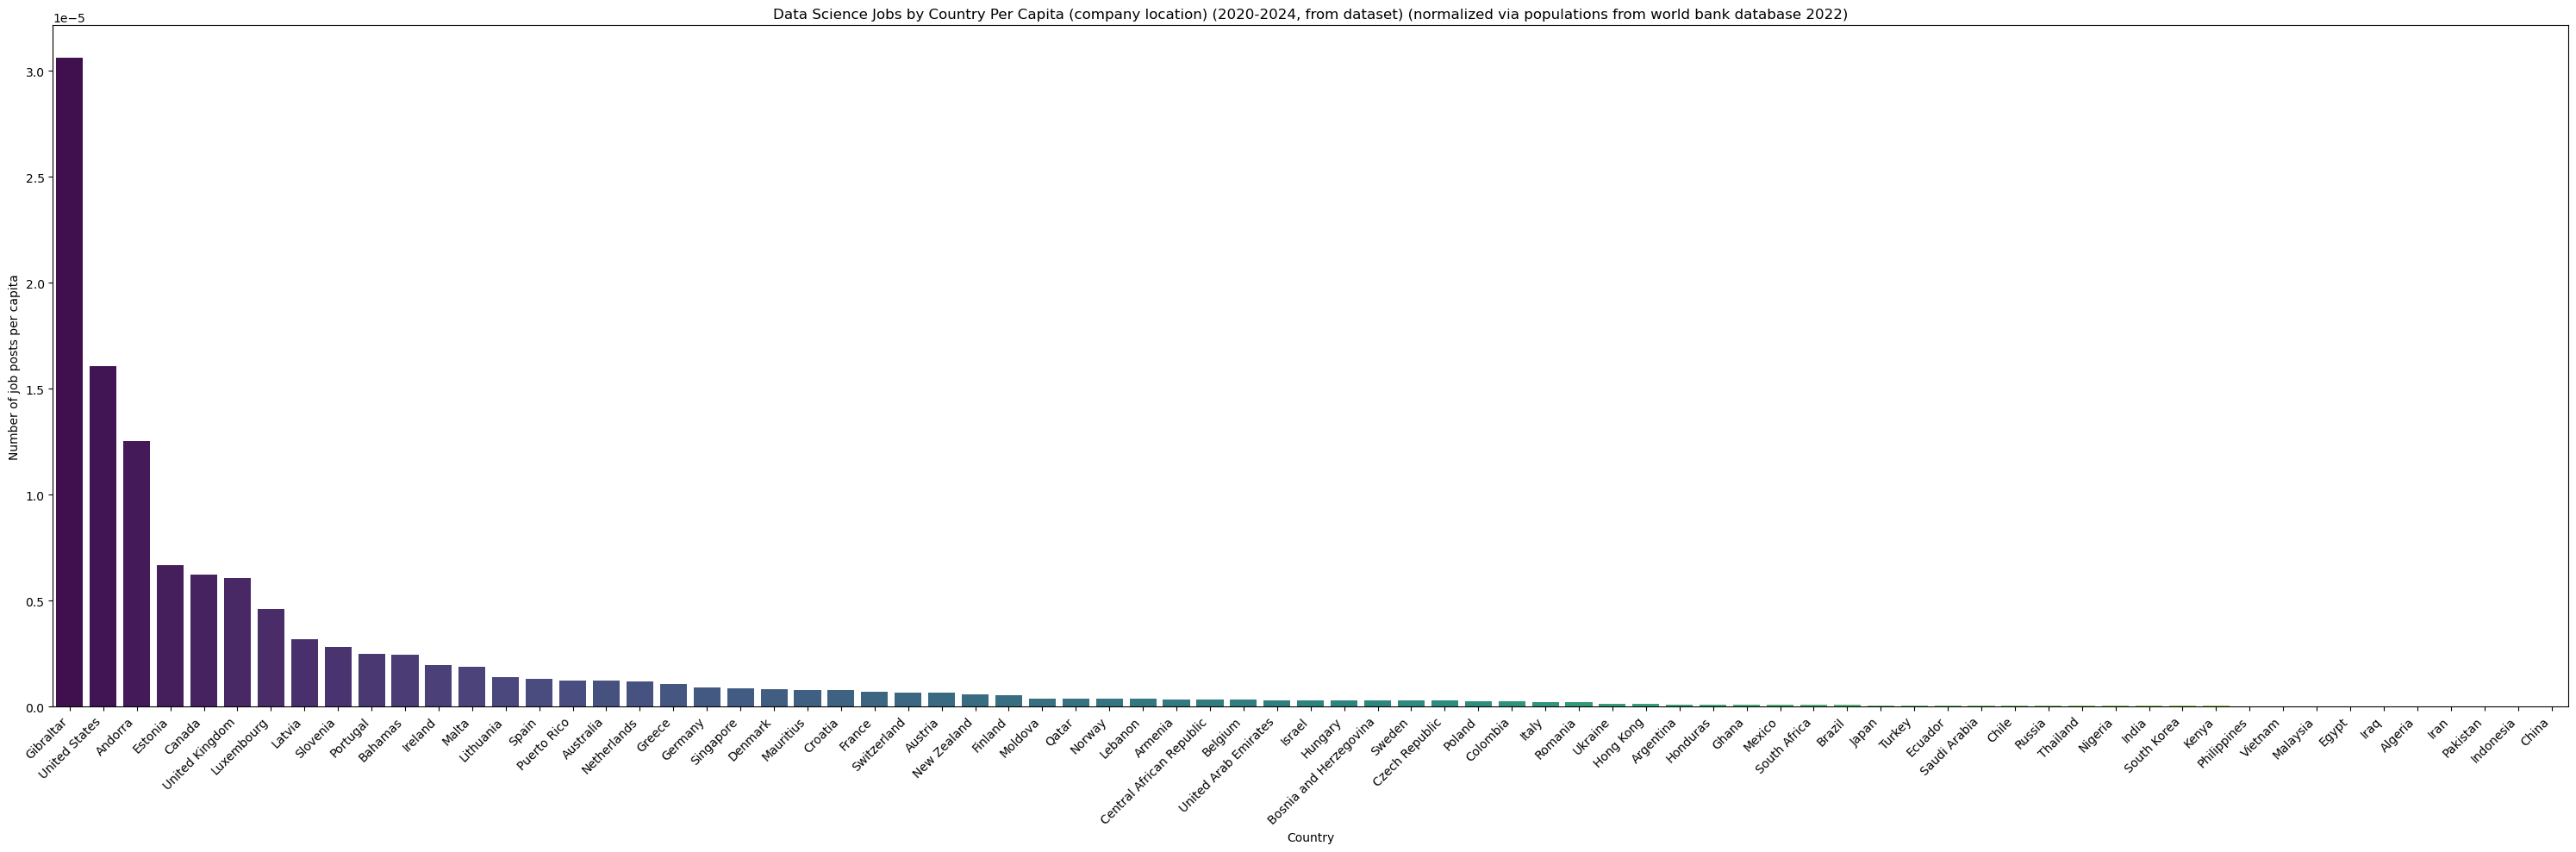

In [95]:
#now sort and graph the results:

sorted_country_company_count_population_df = country_company_count_population_df.sort_values(by='counts_per_capita',ascending=False)


plt.figure(figsize=(30, 10))
sns.barplot(x='country', y='counts_per_capita', data=sorted_country_company_count_population_df, palette='viridis')
plt.title(f'Data Science Jobs by Country Per Capita (company location) (2020-2024, from dataset) (normalized via populations from world bank database 2022)')
plt.xlabel('Country')
plt.ylabel('Number of job posts per capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 


plt.savefig(Path('../figures//riley/fig011.png'))
plt.show()

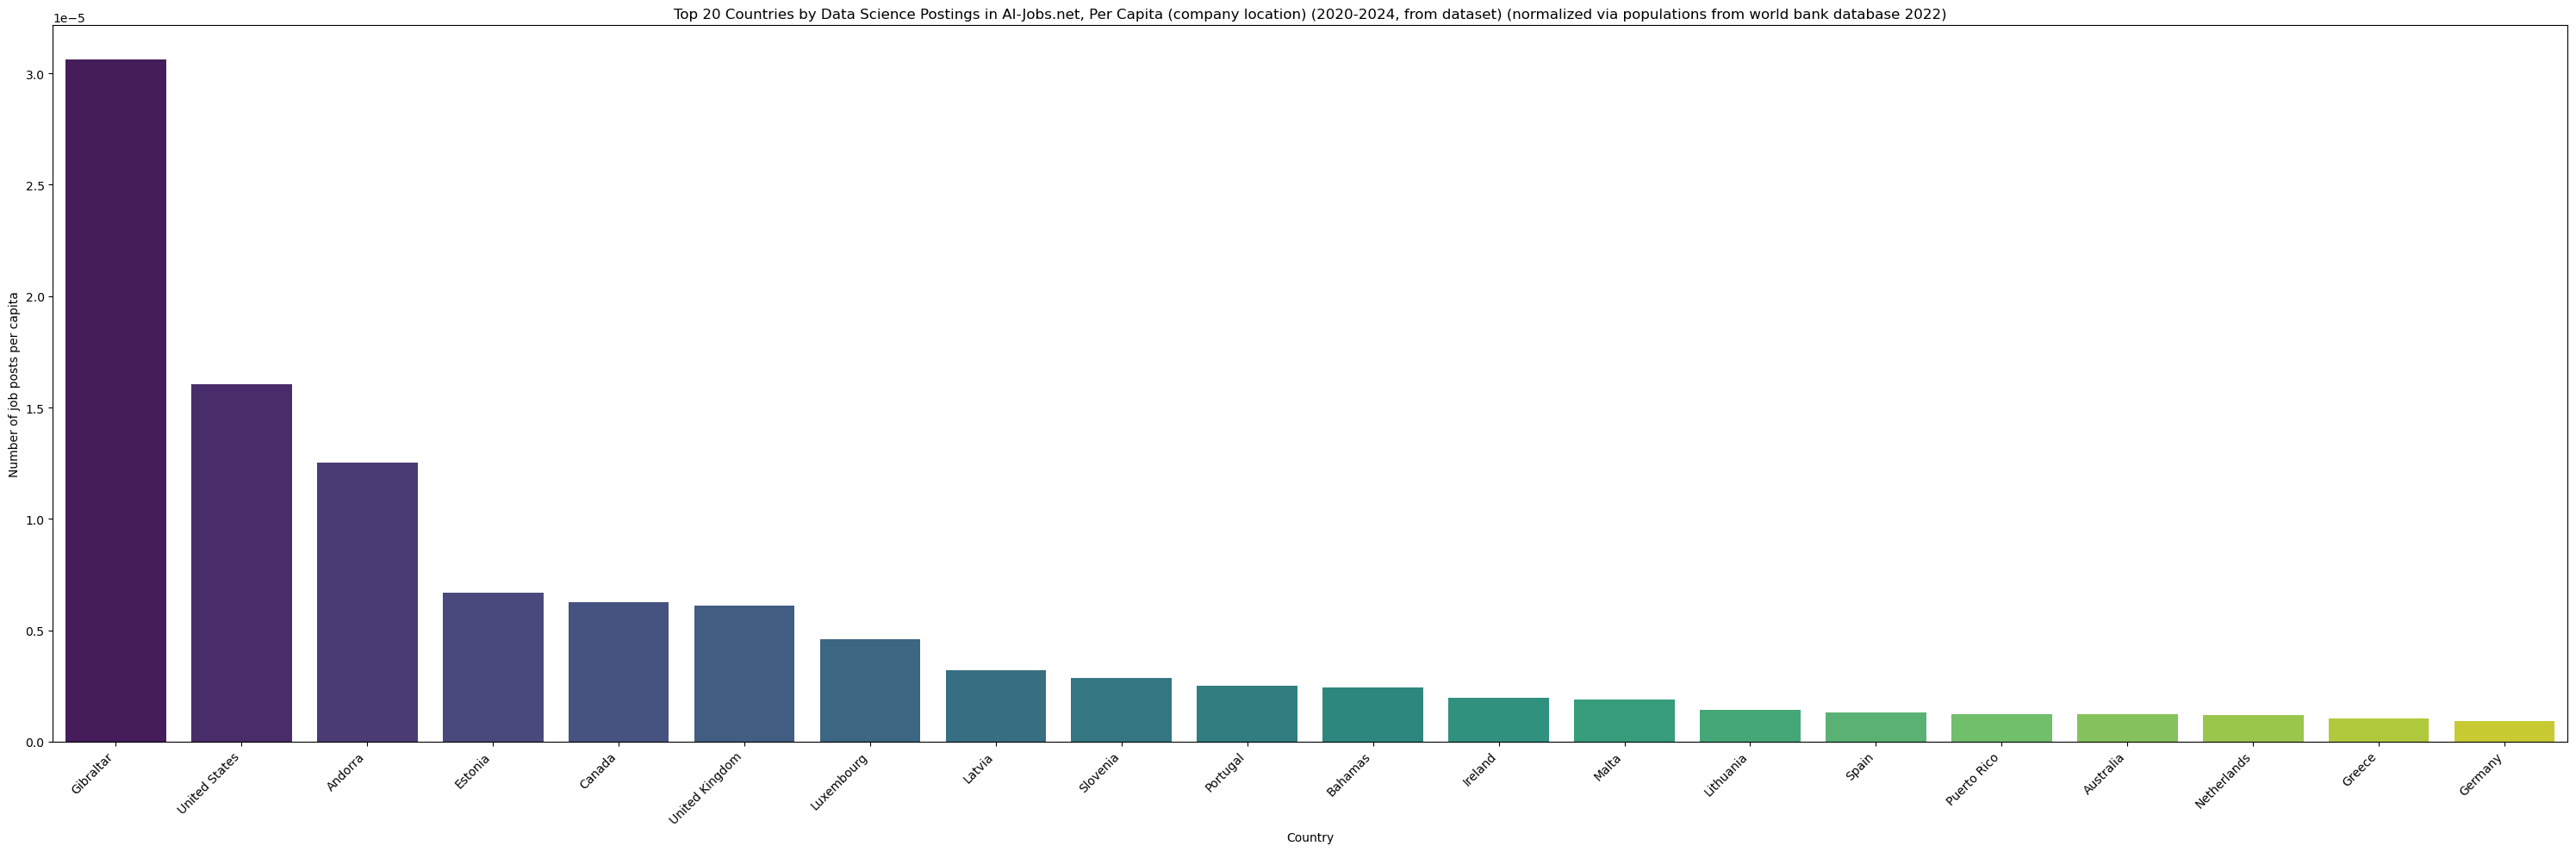

In [96]:
#showing the top 20:
top_num = 20
top_num_df = sorted_country_company_count_population_df.nlargest(20, 'counts_per_capita')

plt.figure(figsize=(30, 10))
sns.barplot(x='country', y='counts_per_capita', data=top_num_df, palette='viridis')
plt.title(f'Top {top_num} Countries by Data Science Postings in AI-Jobs.net, Per Capita (company location) (2020-2024, from dataset) (normalized via populations from world bank database 2022)')
plt.xlabel('Country')
plt.ylabel('Number of job posts per capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 


plt.savefig(Path('../figures//riley/fig012.png'))
plt.show()


## How does the count of a country's data science jobs in our data set, per capita, correlate to gdp per capita of said country? (using company location)

### Conclusion:

You can think of this question as a sort of determination of whether the derived statistic we found actually correlate to a development indicator. Do more data science jobs per capita in a country imply that the country is more developed? Arguably the most popular development indicator is GDP per capita. So I will see if there is a correlation between the GDP per capita and the number of data science postings to our dataset per capita. 

There are a few flaws in my approach, but the goal is to create a visual and see if we see any correlation. The main flaws are the fact that I am aggregating job postings over several years (although primarily from 2023, as about 50% of the data comes from that one year), but comparing to population data exclusively from 2022. However, since this comparison is applied to all countries in the same way, it won't really skew the comparative visualizations, but the individual data points might not be as insightful. 


After cleaning the data a bit to remove points with NAN values, we see a slight positive correlation, with r_value = $0.312...$ . I expected a stronger correlation, but considering the skew of the data, and some of the flaws in the approach, this does make sense. 

Before I completely throw out this metric as a possible indicator for a country's development, I'd suggest trying to find ways to get more data on other countries. Perhaps there is data available in various government statistic sites that can be aggregated, but that could be extremely messy. Alternatively, perhaps this dataset will become more reliable and sufficiently saturate the data science labor markets in the following years, so more of a country by country analysis can be done. 



In [97]:
#create the data frame we want
# sorted_country_company_counts_df
# world_bank_df

country_metrics_df = world_bank_df.copy()

#create a new dataframe that inner merges (intersection) the dataframes we want to use, then create a column for counts/
country_merged_metrics_df = sorted_country_company_counts_df.merge(country_metrics_df, left_on='company_location', right_on='country', how='inner')

country_merged_metrics_df['counts_per_capita'] = country_merged_metrics_df['count']/country_merged_metrics_df['population']

#create a new column, called gdp_per_capita_in_millions_usd that divides the gdp per capita by 1e6
country_merged_metrics_df['gdp_per_capita_in_millions_usd'] = country_merged_metrics_df['gdp_pc']/(1e6)


#note that at this point, we start to have some NAN values resulting from the API calls. Not every country had gdp per capita, like Lebanon and Gibraltar


#66 entries
print(country_merged_metrics_df.shape[0])

#drop nan values:
country_merged_metrics_df = country_merged_metrics_df.dropna()

#58 entries
print(country_merged_metrics_df.shape[0])




#note that 'year' is from world bank df, and refers to the year of the data found
country_merged_metrics_df.head()

75
65


,company_location,count,country,id,year,population,gdp_pc,tech_manu_percent,counts_per_capita,gdp_per_capita_in_millions_usd
0,United States,5354,United States,US,2022,333287557,76329.582265,17.850454,1.606421e-05,0.076330
1,United Kingdom,408,United Kingdom,GB,2022,66971395,46125.255751,26.523137,6.092153e-06,0.046125
2,Canada,243,Canada,CA,2022,38929902,54917.662523,13.669666,6.241988e-06,0.054918
3,Germany,78,Germany,DE,2022,83797985,48717.991140,15.991209,9.308100e-07,0.048718
4,Spain,63,Spain,ES,2022,47778340,29674.544286,12.414756,1.318589e-06,0.029675


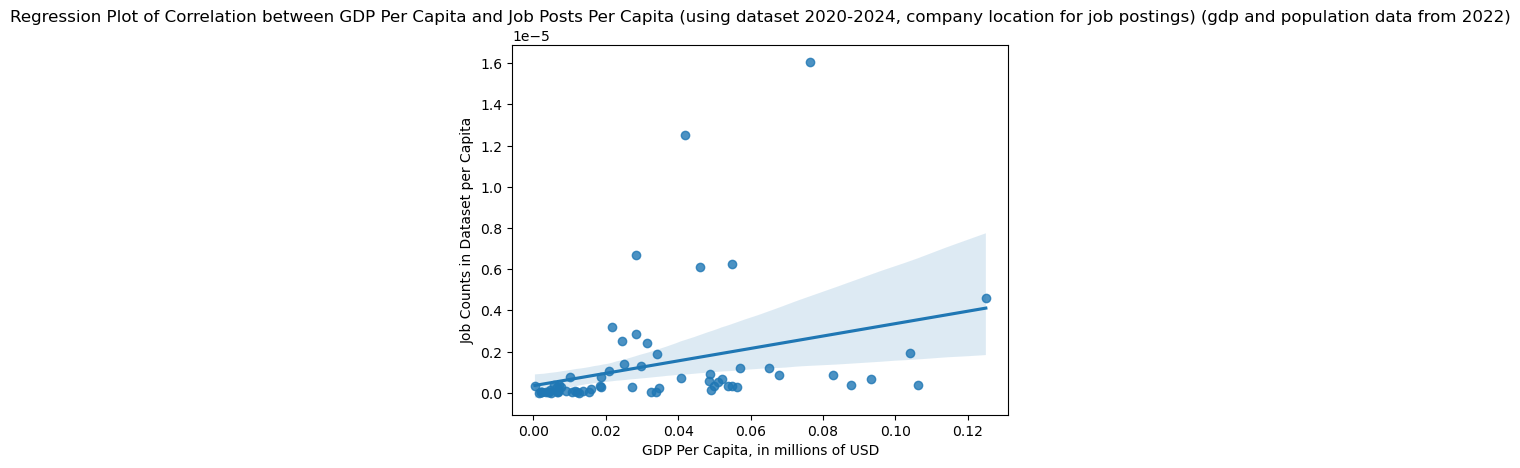

In [98]:
#chat gpt helped me identify seaborn regplot to get regression done automatically

sns.regplot(x=country_merged_metrics_df['gdp_per_capita_in_millions_usd'],y=country_merged_metrics_df['counts_per_capita'], fit_reg=True)
plt.title('Regression Plot of Correlation between GDP Per Capita and Job Posts Per Capita (using dataset 2020-2024, company location for job postings) (gdp and population data from 2022)')
plt.xlabel('GDP Per Capita, in millions of USD')
plt.ylabel('Job Counts in Dataset per Capita')

plt.savefig(Path('../figures//riley/fig013.png'))
plt.show()


In [99]:
# I can get correlation coefficient and regression line from scipy:
slope, intercept, r_value, p_value, std_err = linregress(country_merged_metrics_df['gdp_per_capita_in_millions_usd'],country_merged_metrics_df['counts_per_capita'])

print(f'Correlation Coefficient (r): {r_value:.8f}')
print(f'r^2 Value (r^2): {r_value**2:.8f}')
print(f'Regression Line Equation: y = {slope:.8f}x + {intercept:.8f}')



Correlation Coefficient (r): 0.31943667
r^2 Value (r^2): 0.10203979
Regression Line Equation: y = 0.00003013x + 0.00000035


## End of Riley Notebook